In [44]:
import tweepy
import json
import pandas as pd
import os
import numpy as np
from dateutil import parser
from datetime import timedelta
import matplotlib.pyplot as plt
# Your Twitter API Keys
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = "C:/Users/Jana/Desktop/json_keys/api_keys.json"
data = json.load(open(file_name))

gkey = data['google_places_api_key']
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [45]:
# Target Hashtags
target_tags = ["#olympics", "#pyeongchang", "#southkorea", "#northkorea", "#teamusa"]
time_between_tweets = []

In [46]:
# Loop through each hashtag
for tag in target_tags:
    
    # Create array to record all date-times of tweets
    tweet_times = []
    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    for raw_time in tweet_times:
        tweet_datetime = parser.parse(raw_time)
        tweet_time_objects.append(tweet_datetime)

    time_in_between = []

    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).total_seconds()) 
        time_in_between.append(secs_apart)

    print("Avg. Seconds Between Tweets: %s" % np.mean(time_in_between))
    print("")

#olympics
Avg. Seconds Between Tweets: 0.285714285714

#pyeongchang
Avg. Seconds Between Tweets: 5.64285714286

#southkorea
Avg. Seconds Between Tweets: 10.7692307692

#northkorea
Avg. Seconds Between Tweets: 34.5

#teamusa
Avg. Seconds Between Tweets: 2.78571428571



In [47]:
tweets_df = pd.DataFrame({"Hashtag": target_tags, "Average Seconds Between Tweets": [0.21, 5.23, 5.58, 19.29, 2.57]})
tweets_df.set_index("Hashtag")

,Average Seconds Between Tweets
Hashtag,
#olympics,0.21
#pyeongchang,5.23
#southkorea,5.58
#northkorea,19.29
#teamusa,2.57


In [48]:
hashtags = ["olympics", "pyeongchang", "southkorea", "northkorea", "teamusa"]
time_between_tweets = [0.21, 5.23, 5.58, 19.29, 2.57]
x_axis = np.arange(len(time_between_tweets))

In [49]:
plt.bar(x_axis, time_between_tweets, color='blue', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["olympics", "pyeongchang", "southkorea", "northkorea", "teamusa"])

([<matplotlib.axis.XTick at 0x2398b8fb748>,
 <a list of 5 Text xticklabel objects>)

In [50]:
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, 20, 2)

(0, 20)

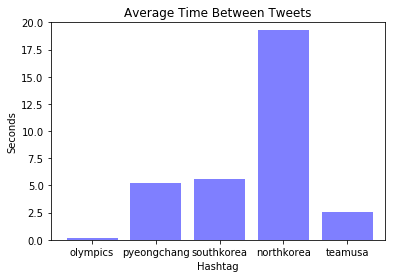

In [51]:
plt.title("Average Time Between Tweets")
plt.xlabel("Hashtag")
plt.ylabel("Seconds")
plt.savefig("tweet_times.png")
plt.show()